#### wczytywanie danych

In [8]:
wino = read.table("http://theta.edu.pl/wp-content/uploads/2018/03/dane_wino.txt", sep = ",", dec = ".", header = TRUE)
head(wino)
unique(wino[,1])

X1,X14.23,X1.71,X2.43,X15.6,X127,X2.8,X3.06,X.28,X2.29,X5.64,X1.04,X3.92,X1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290


[1] 1 2 3

#### konstrukcja pierwszego drzewa klasyfikacyjnego

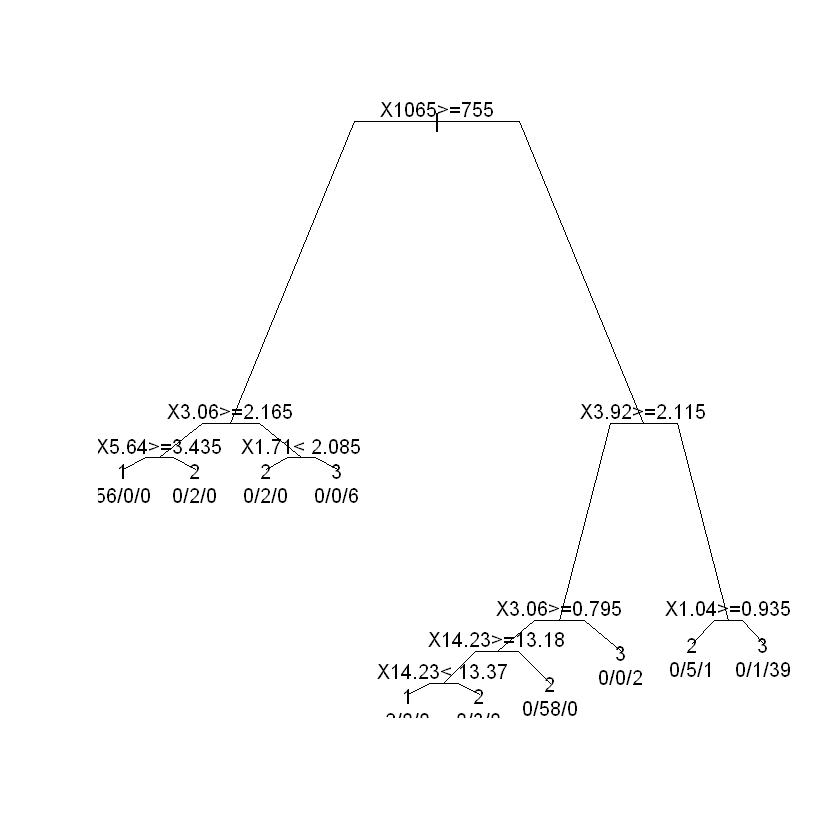

In [10]:
library(rpart)

tree = rpart(as.factor(X1) ~ ., data = wino, minsplit = 5, cp = 0.0001)
plot(tree,  branch = 0.4)  # nachylenie gałęzi drzewa
text(tree, use.n = TRUE)

#### wyznaczenie optymalnej wartości współczynnika złożoności

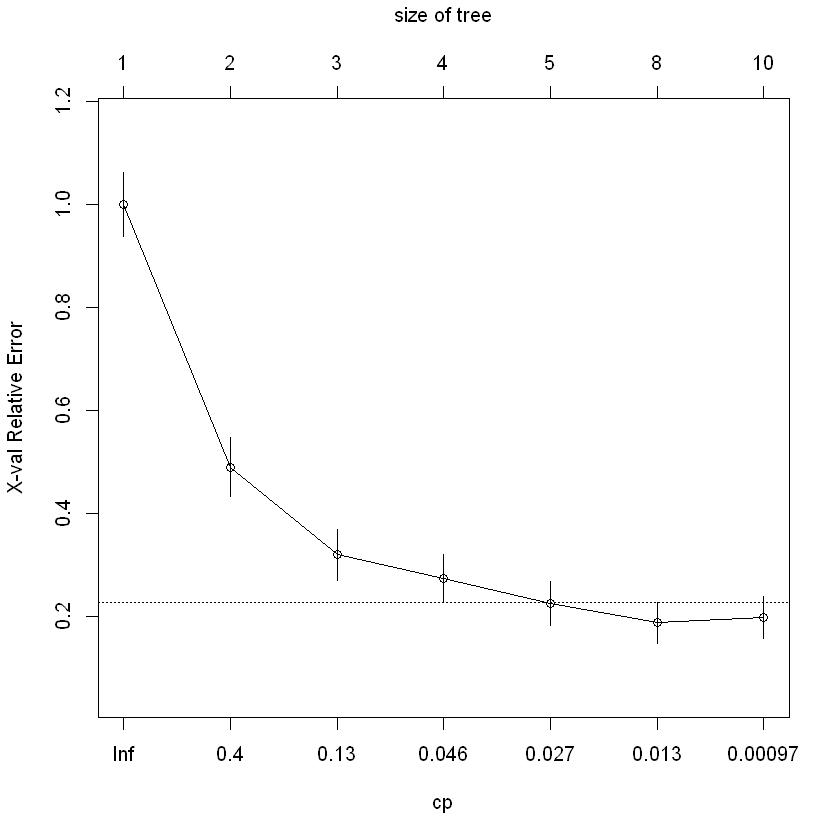

In [11]:
plotcp(tree)

In [12]:
cp_optimal <- (0.027+0.00097)/2


[1] 0.013985

#### wyznaczanie drzewa z optymalnym współczynnikiem złożoności

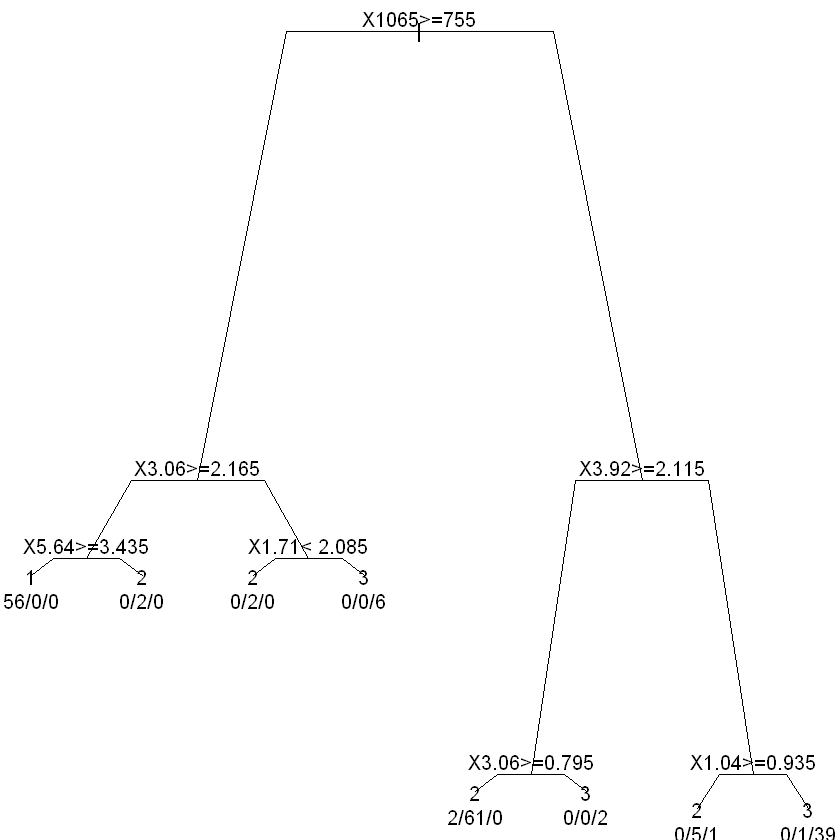

In [13]:
tree_new = rpart(as.factor(X1) ~ ., data = wino, minsplit = 5, cp = cp_optimal)
par(mar=c(0, 0, 0, 0))
plot(tree_new, branch = 0.6)
text(tree_new, use.n = TRUE)

# drzewo z nowym współczynnikiem złożoności

#### wybór optymalnego drzewa przy pomocy metody cross-walidacji

In [17]:
cp_new <- cp_optimal
cp_orig <- 0.0001

n = nrow(wino)
res_orig = rep(0, n)   # definiujemy wektory zapełnione zerami
res_new = rep(0, n)


for (i in 1:n) {
    train = wino[-i, ]  # to jest cross-walidacja (leave one out)
    test = wino[i, ]
    tree_orig = rpart(factor(X1) ~ ., data = train, minsplit = 5, cp = cp_orig)    # robimy drzewa
    tree_new = rpart(as.factor(X1) ~ ., data = train, minsplit = 5, cp = cp_new)
    pred_orig = predict(tree_orig, newdata = test, type = "class")   # robimy predykcję
    pred_new = predict(tree_new, newdata = test, type = "class")   
    if (pred_orig != factor(test$X1))  # jeśli mamy błędną klasyfikację to w wektorze, zamieniamy 0 na 1
        res_orig[i] = 1
    if (pred_new != factor(test$X1))
        res_new[i] = 1
}

#### szacowanie ułamku błędnych klasyfikacji na podstawie cross-walidacji

In [18]:
# sumujemy poprostu liczbę jedynek w naszych dwóch wektorach

sum(res_orig) / n * 100
sum(res_new) / n * 100

[1] 11.29944

[1] 11.29944

#### szacowanie ułamku błednych klasyfikacji dla drzewa z cp = 0.005

In [21]:
cp_new <- 0.005
cp_orig <- 0.0001

n = nrow(wino)
res_orig2 = rep(0, n)   # definiujemy wektory zapełnione zerami
res_new2 = rep(0, n)


for (i in 1:n) {
    train = wino[-i, ]  # to jest cross-walidacja (leave one out)
    test = wino[i, ]
    tree_orig = rpart(factor(X1) ~ ., data = train, minsplit = 5, cp = cp_orig)    # robimy drzewa
    tree_new = rpart(as.factor(X1) ~ ., data = train, minsplit = 5, cp = cp_new)
    pred_orig = predict(tree_orig, newdata = test, type = "class")   # robimy predykcję
    pred_new = predict(tree_new, newdata = test, type = "class")   
    if (pred_orig != factor(test$X1))  # jeśli mamy błędną klasyfikację to w wektorze, zamieniamy 0 na 1
        res_orig2[i] = 1
    if (pred_new != factor(test$X1))
        res_new2[i] = 1
}

In [22]:
# sumujemy poprostu liczbę jedynek w naszych dwóch wektorach

sum(res_orig2) / n * 100
sum(res_new2) / n * 100

[1] 11.29944

[1] 11.29944